<a href="https://colab.research.google.com/github/Shreehari-Acharya/Quantum-computing-101/blob/main/quantum_computing_basics_with_qiskit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install qiskit qiskit-ibm-runtime qiskit-aer

In [ ]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram


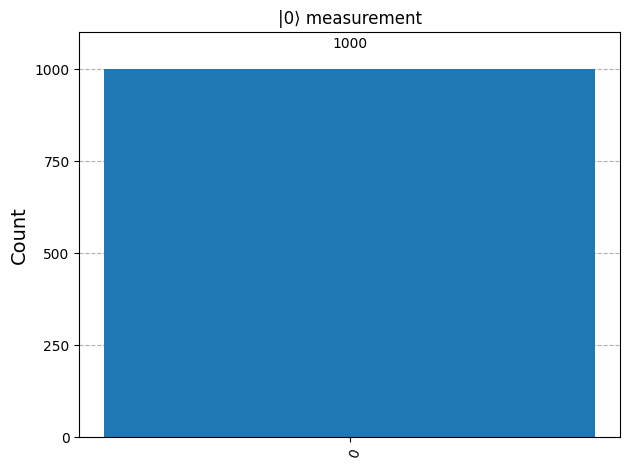

In [ ]:
# A simple qubit creation and measurement

qc = QuantumCircuit(1) # quantum circuit with 1 qubit &
qc.measure_all() # measure the qubit. It will always measure 0 because the qubit started in |0⟩

# Simulator
simulator = AerSimulator()

# Compile circuit for simulator
qc = transpile(qc, simulator)

# Run job
result = simulator.run(qc, shots=1000).result()

# Extract counts
counts = result.get_counts(qc)

plot_histogram(counts, title="|0⟩ measurement")

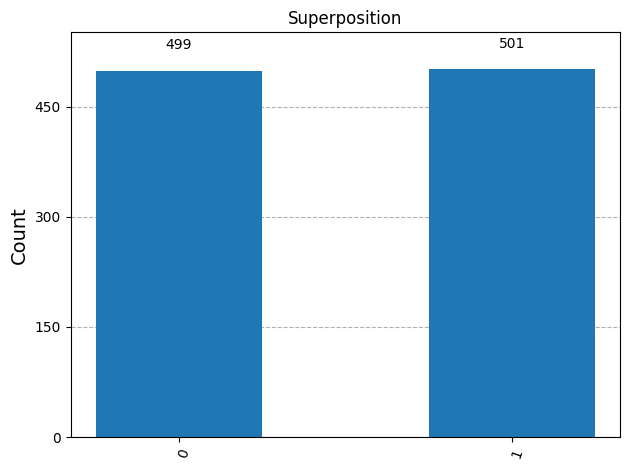

In [ ]:
# Creating a superposition qubit

qc = QuantumCircuit(1)
qc.h(0)               # Hadamard puts qubit into superposition
qc.measure_all()

simulator = AerSimulator()

qc = transpile(qc, simulator)

result = simulator.run(qc, shots=1000).result()

counts = result.get_counts(qc)

plot_histogram(counts, title="Superposition")


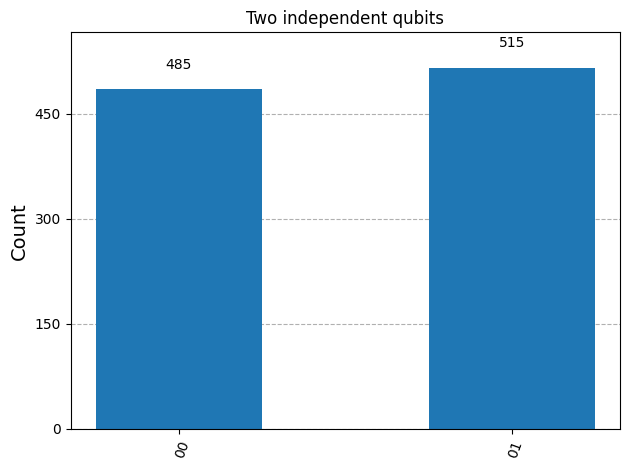

In [ ]:
# Two Qubits (Independent)

qc = QuantumCircuit(2)

# Only first qubit in superposition
qc.h(0)

qc.measure_all()

simulator = AerSimulator()
compiled = transpile(qc, simulator)
result = simulator.run(compiled, shots=1000).result()

counts = result.get_counts(compiled)
plot_histogram(counts, title="Two independent qubits")

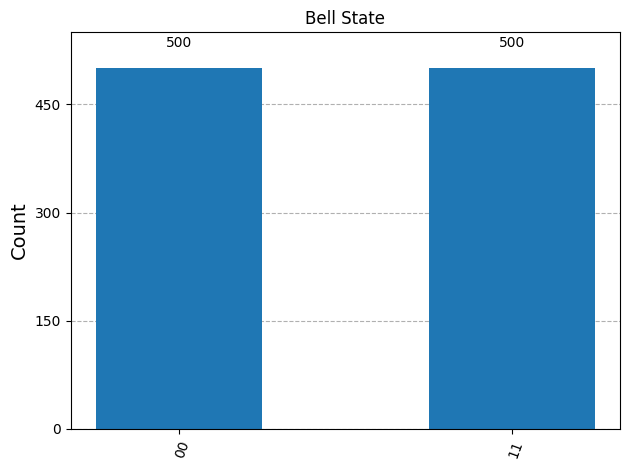

In [ ]:
# Entanglement (Bell State)
qc = QuantumCircuit(2)

# Create Bell pair
qc.h(0)
qc.cx(0, 1)

qc.measure_all()

simulator = AerSimulator()
compiled = transpile(qc, simulator)
result = simulator.run(compiled, shots=1000).result()

counts = result.get_counts(compiled)
plot_histogram(counts, title="Bell State")

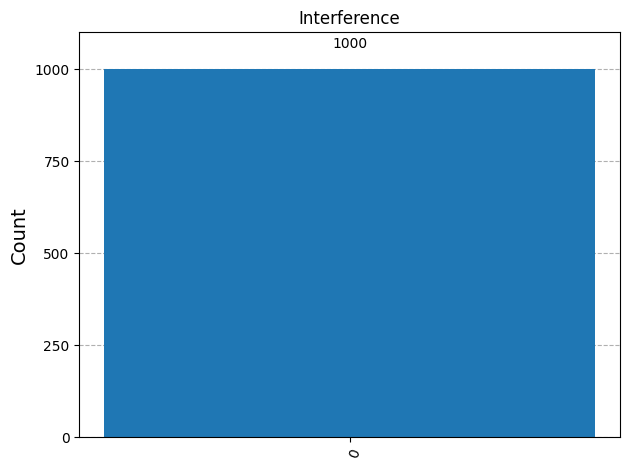

In [ ]:
# Interference - If we apply hadamard gate twice to a qubit, it returns back
# to the original state

qc = QuantumCircuit(1)

qc.h(0)
qc.h(0)

qc.measure_all()

simulator = AerSimulator()
compiled = transpile(qc, simulator)
result = simulator.run(compiled, shots=1000).result()

counts = result.get_counts(compiled)
plot_histogram(counts, title="Interference")

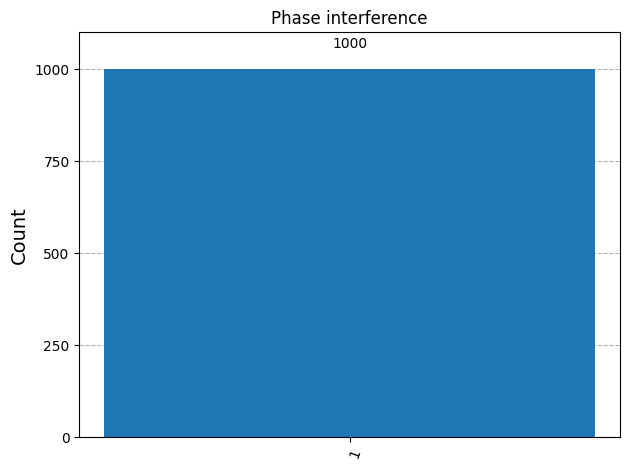

In [ ]:
# Phase Does NOT Show in Measurement

qc = QuantumCircuit(1)

qc.h(0)
qc.z(0)   # adds phase
qc.h(0)

qc.measure_all()

simulator = AerSimulator()
compiled = transpile(qc, simulator)
result = simulator.run(compiled, shots=1000).result()

counts = result.get_counts(compiled)
plot_histogram(counts, title="Phase interference")